# Multiple Linear Regression with sklearn - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [7]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv('realestatepricesizeyear.csv')

In [3]:
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


## Create the regression

### Declare the dependent and the independent variables

In [4]:
x = data[['size', 'year']]
y = data['price']

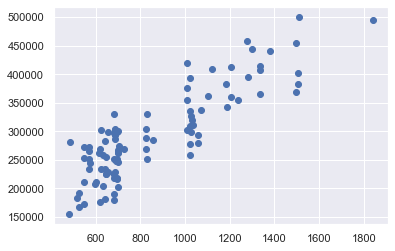

In [22]:
plt.scatter(data['size'], y)

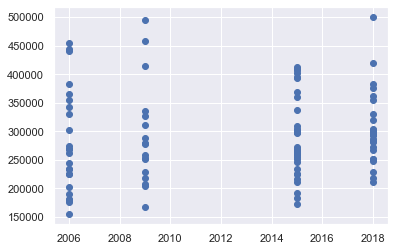

In [23]:
plt.scatter(data['year'], y)

### Regression

In [26]:
# We start by creating a linear regression object
reg = LinearRegression()

# The whole learning process boils down to fitting the regression
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Find the intercept

In [9]:
reg.intercept_

-5772267.017463278

### Find the coefficients

In [10]:
reg.coef_

array([ 227.70085401, 2916.78532684])

### Calculate the R-squared

In [11]:
reg.score(x, y)

0.7764803683276793

### Calculate the Adjusted R-squared

In [12]:
def adjusted_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [15]:
r2_adj = adjusted_r2(x,y)
r2_adj

0.77187171612825

### Compare the R-squared and the Adjusted R-squared

Rsqd adj (0.7718) is smaller than the R-sqr (0.7764) indicating that adding a 2nd feature to our model didn't made it more significant. it just adjusted for the number of variables included in the model

### Compare the Adjusted R-squared with the R-squared of the simple linear regression

Adj R-sqr(0.77187) = R-sqr(0.77187) of the simple linear regression which demonstrates that adding the 2nd feature tp our model didn't add value to it

### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [29]:
reg.fit(x,y)
reg.predict(np.array([750, 2009]).reshape(1, -1))

array([258330.34465995])

### Calculate the univariate p-values of the variables

In [30]:
from sklearn.feature_selection import f_regression

In [31]:
f_regression(x,y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [32]:
p_values = f_regression(x,y)[1]
p_values

array([8.12763222e-31, 3.57340758e-01])

In [33]:
p_values.round(3)

array([0.   , 0.357])

### Create a summary table with your findings

In [35]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,size,227.700854,0.000
1,year,2916.785327,0.357


Answer...